### Practice Exercise (Linear Regression)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
#loading the dataset
df = pd.read_csv('crop-yield.csv')

print(f'Shape of the dataset:\n {df.shape}\n')
print(f'Missing values in dataset:\n {df.isnull().sum()}\n')

Shape of the dataset:
 (25, 2)

Missing values in dataset:
 Rainfall_mm    0
Yield_tons     0
dtype: int64



In [6]:
#defining the feature and target variable
X = df[['Rainfall_mm']].values
y = df[['Yield_tons']].values


In [7]:
#spliting the training and test sets
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
#training the regression model
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [24]:
#printing the slope and intercept
print(f'Intercept: {ln.intercept_[0]:.2f}\n')
print(f'Coefficient: {ln.coef_[0]}')

Intercept: 0.80

Coefficient: [0.01045013]


In [37]:
#making the prediction
pred_y = ln.predict(X_test)
pred_X = ln.predict(X_train)

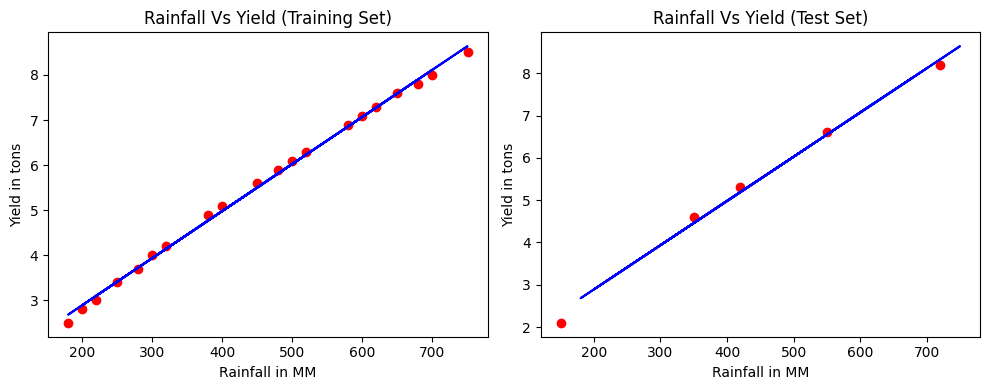

In [27]:
#visualization of the predictions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train,color='r')
plt.plot(X_train, pred_X,color='blue')
plt.title("Rainfall Vs Yield (Training Set)")
plt.ylabel("Yield in tons")
plt.xlabel("Rainfall in MM")

plt.subplot(1,2,2)
plt.scatter(X_test,y_test,color='r')
plt.plot(X_train,pred_X,color='blue')
plt.title("Rainfall Vs Yield (Test Set)")
plt.ylabel("Yield in tons")
plt.xlabel("Rainfall in MM")

plt.tight_layout()
plt.show()

In [38]:
#Evaluate Model 
R2 = r2_score(y_test,pred_y)

mae = mean_absolute_error(y_test,pred_y)

print(f'Mean Absolute Error: {mae:.2f}\n')
print(f'R_2 Score: {R2}')

if R2 >= 0.9:
    print('Perfect Model')
elif R2 >= 0.7:
    print('Okish model')
else:
    print('Model Needs improvement')

Mean Absolute Error: 0.14

R_2 Score: 0.9941134916533674
Perfect Model
